In [1]:
import vtk
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
T = 1200  # number of timesteps performed

arraynames = ["diameter","pressure","velocity", "iters"]   # Which dataset should be plotted?
data_path = "./output_second_mu_rom/out_fluid_"  # Where is the data?


def file_name_generator(id): return data_path + str(id) + ".vtk"


print("parsing datasets named %s*.vtk" % data_path)

values_for_all_t = T * [None]

dx = .1
dt = .1
N = 100
mesh = np.arange(0, dx*(N+1), dx)
time = np.arange(0, dt*T, dt)+dt

parsing datasets named ./output_second_mu_rom/out_fluid_*.vtk


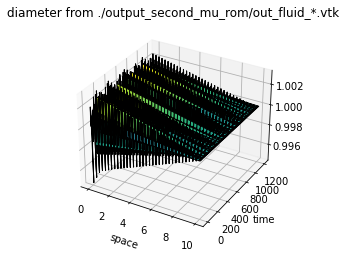

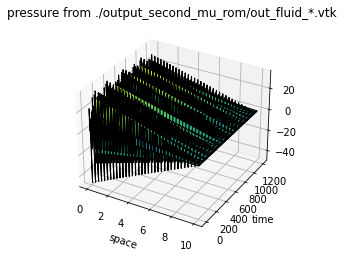

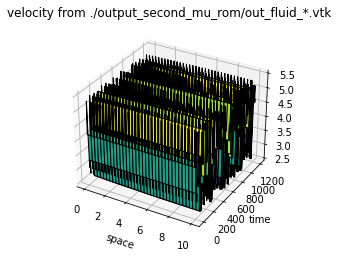

In [3]:
data_ = []
for name in arraynames:
    for t in range(T):

        # read the vtk file as an unstructured grid
        reader = vtk.vtkUnstructuredGridReader()
        reader.SetFileName(file_name_generator(t))
        reader.ReadAllVectorsOn()
        reader.ReadAllScalarsOn()
        reader.Update()

        # parse the data
        grid = reader.GetOutput()
        point_data = grid.GetPointData().GetArray(name)
        points = grid.GetPoints()
        N = grid.GetNumberOfPoints()  # How many gridpoints do exist?

        if point_data is None:  # check if array exists in dataset
            print("array with name %s does not exist!" % name)
            print("exiting.")
            quit()

        value_at_t = []
        spatial_mesh = []

        n = point_data.GetNumberOfComponents()

        for i in range(N):  # parse data from vtk array into list

            x, y, z = grid.GetPoint(i)  # read coordinates of point
            spatial_mesh += [x]  # only store x component

            v = np.zeros(n)  # initialize empty butter array
            point_data.GetTuple(i, v)  # read value into v
            value_at_t += [v[0]]

        values_for_all_t[t] = value_at_t


    values_for_all_t = np.array(values_for_all_t)
    
    data_.append(values_for_all_t.copy().T)
        
    if name != "iters":
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        X, Y = np.meshgrid(spatial_mesh, range(T))

        # uncomment depending on what quantity you want to plot
        ax.plot_surface(X, Y, values_for_all_t, cmap='viridis', edgecolor='black');
        plt.xlabel("space");
        plt.ylabel("time");
        plt.title(name + " from " + data_path + "*.vtk");
        plt.show();
data_[3] = data_[3][0, :].copy()

In [4]:
fom_pressure = np.load("./FOM_DATA/second_mu/pressure.npy")
fom_section = np.load("./FOM_DATA/second_mu/diameter.npy")
fom_velocity = np.load("./FOM_DATA/second_mu/velocity.npy")
iters_fom = np.load("./FOM_DATA/second_mu/iters.npy")

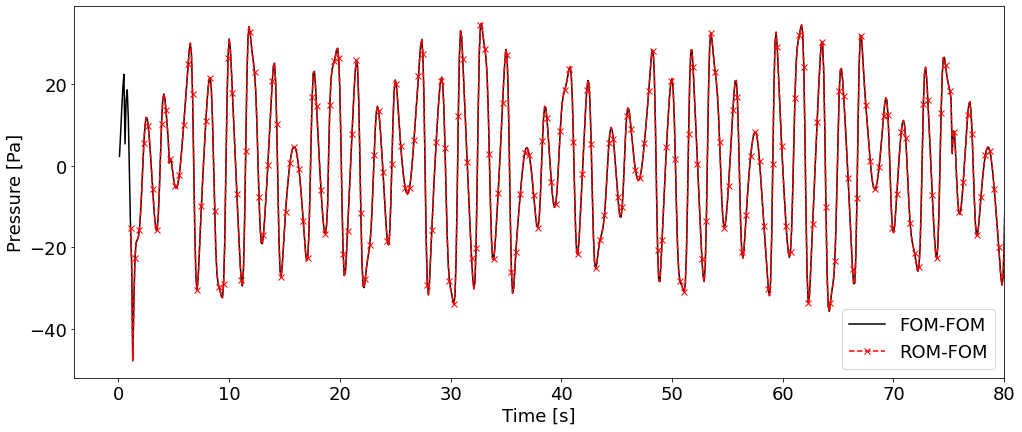

In [5]:
fig, ax= plt.subplots(figsize = (14, 6))

plt.plot(time, fom_pressure[0, :], '-', markevery = 4, color = 'k', label = 'FOM-FOM');
plt.plot(time[10:], data_[1][0, 10:], 'x--', markevery = 4, label = 'ROM-FOM', color = 'red');

plt.xlim(-4., 80.);
plt.xlabel("Time [s]", fontsize = 18)
plt.ylabel("Pressure [Pa]", fontsize = 18)
plt.tight_layout();
plt.legend(fontsize = 18);
ax.tick_params(axis='both', which='major', labelsize=18)


#plt.savefig("tube_mu.pdf", bbox_inches = 'tight');


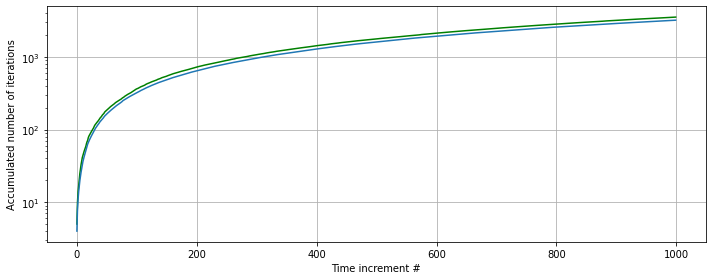

In [6]:
fig = plt.figure(figsize = (10, 4));
plt.semilogy(np.cumsum(data_[3][200:]), color = 'green', markersize = 6);
plt.semilogy(np.cumsum(iters_fom[200:]), markersize = 6);
plt.grid();
plt.xlabel("Time increment #");
plt.ylabel("Accumulated number of iterations");

plt.tight_layout();
#plt.savefig("iters_tube.eps", bbox_inches = 'tight');